# Monte Carlo 1D Ising Model: Metropolis Algorithm

N spins, B = 0, J = 1, k = 1

In [1]:
from math import *
from random import *
import numpy as np
import matplotlib.pyplot as plt

Some basic conditions (to test functions & debugging):

In [13]:
N = 1000
I = np.ones(N) #all spins up, periodic bounday conditions
T = 3 #final temp, near critical region
beta_0 = 1/T #make k = 1 here for simplicity

Defining functions that calculate internal energy, flip a spin, and energy change when flipping a spin:

In [3]:
def E(ising_array): #gets energy in ising array
    total_E = 0
    for i in range(len(ising_array)):
        total_E += -ising_array[i]*ising_array[(i+1)%len(ising_array)] #periodic sum
    return total_E

In [4]:
def flip(ising_array, k): #just flips kth spin
    ising_array[k] = -ising_array[k]  #updated array
    return 0

In [5]:
def flip_dE(ising_array, k): #energy when flipping kth spin
    dE = 2*ising_array[k]*(ising_array[(k-1)%len(ising_array)]+ising_array[(k+1)%len(ising_array)])
    return dE

Using the above functions, we can apply the metropolis algorithm to N randomly
chosen spins (sweep):

In [10]:
def cycle(ising_array, beta): #does 1 sweep
    for i in range(int(len(ising_array)/1)): 
        j = randint(0, len(ising_array) - 1) #random jth spin is chosen
        delta_E = flip_dE(ising_array, j)
      
        if delta_E < 0: #always allow transition to lower energy state
            flip(ising_array, j)
        
        else:
            if(random() < e**(-4 * beta)):
                flip(ising_array, j) #much more likely to transition down than up...
    return E(I)

Running a simulation to equilibrium conditions takes around 1000 sweeps (possibly more for low T),
since the simulation is longer near the critical region (where the phase 
transition from ferromagnet to paramegnet occurs)

In [69]:
def simulation(ising_array, beta): #returns average energy of equilibrium state (since computational E(t) is not smooth)
    E_total = 0
    for i in range(1000):
        if(i > 500): #needs to get to equilibrium first
            E_total += cycle(I, beta)
    E_avg = E_total/509
    return E_avg

Checking what a good simulation time is, by plotting E(t) where T=3, near the critical regime (so time until equilibrium is longer)

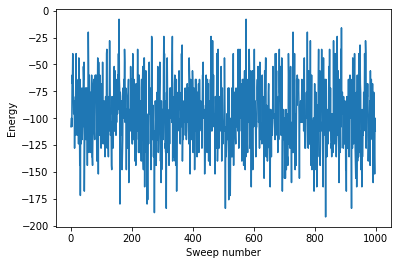

In [47]:
E_array_0 = [] #array of energy values after each cycle
cn = [] #cycle number
beta_0 = 0.1
I = np.ones(1000)

for i in range(1000):
    cn.append(i)
    E_array_0.append(cycle(I, beta_0)) 

plt.plot(cn, E_array_0)
plt.xlabel("Sweep number")
plt.ylabel("Energy")
plt.show()


Comparing analytic to computationally determined energies at a variety of temperatures:

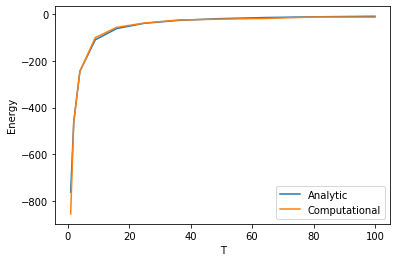

In [48]:
T_array = np.asarray([1, 2, 4, 9, 16, 25, 36, 49, 64, 81, 100])
beta_array = 1/T_array #k = 1
E_analytic = -N*np.tanh(1/T_array)

E_comp = []

for i in range(len(T_array)):
    I = np.ones(N)
    E_comp.append(simulation(I, 1/T_array[i]))
    
plt.plot(T_array, E_analytic, label="Analytic")
plt.plot(T_array, E_comp, label="Computational")
plt.legend()
plt.xlabel("T")
plt.ylabel("Energy")
plt.show()


Now comparing computational results to analytic at low temperature:

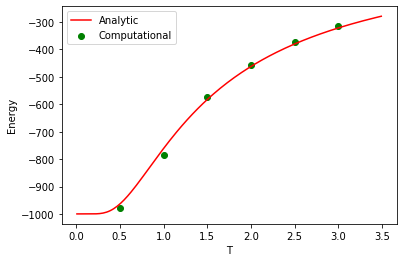

In [90]:
N = 1000
T_array1 = np.arange(0.01, 3.5, 0.02)
T_array2 = np.asarray([0.5, 1, 1.5, 2, 2.5, 3])
beta_array = 1/T_array #k = 1
E_analytic = -N*np.tanh(1/T_array1)
E_comp = []

for i in range(len(T_array2)):
    I = np.ones(N)
    E_comp.append(simulation(I, 1/T_array2[i]))
    
plt.plot(T_array1, E_analytic, label="Analytic", color="red")
plt.scatter(T_array2, E_comp, label="Computational", color = "green")
plt.legend()
plt.xlabel("T")
plt.ylabel("Energy")
plt.show()